# **Working with the Data Axle Historical Business Location Data**


Email: mdl@library.utoronto.ca <br>
Main Page: https://mdl.library.utoronto.ca/ <br>
UofT MDL Github: https://github.com/MDLutoronto


The Data Axle Historical Business Location Data provides one data file (.txt or .csv format) for each year. The [US data](https://borealisdata.ca/dataset.xhtml?persistentId=doi:10.5683/SP3/GY5K1C) runs from 1997-2024 and contains 11-15 million records per year. The [Canadian data](https://borealisdata.ca/dataset.xhtml?persistentId=doi:10.5683/SP3/IPKREG) runs from 2009-2023 and contains 1.5-2.5 million records per year. Records provide information about business location (including address, census geography & lat/long coordinates (US database only)), number of employees, sales volume, NAICS & SIC codes, unique identifier across time for businesses and parent entities. Complete record layouts and decodes are available for download via the Borealis links above.
<br>

### **Working with the Data Axle Files using Python**

These are tabular datasets, however given their size they are too large to work with or even examine using traditional tools such as Excel or Notepad++. Each file contains millions of rows, and over 100 columns, which is beyond the ability of most software to display. As a result, these data will need to be worked with programatically using your language of choice. The tutorial below contains some basic information to get started on this using Python. In particular, it will show you how to easily export a subset of interest, that is small enough to be worked on using a tool such as Excel.
<br>


### **Understanding the Datasets**

Before querying the data, it's important to understand what is included in each file - ie. which variables or characteristics are present, and what the values for each variable in a particular row represent. For example, the Canadian dataset contains a variable called **EMPSIZ**, which is an employee size code. The values for this variable are A - K, which represent approximate employee size as denoted in the screenshot from the layout decode file below:
<br>

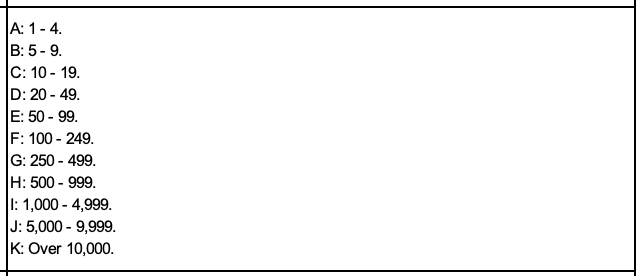

<br>

This information is available from Borealis by downloading the **Layout** files for each country's data. <br> **Note** that the variables, their naming conventions, as well as the decodes differ significantly between the US and Canadian Datasets. This is due to different rules and agreements within these countries and related jurisdictions around what can be collected. 


### **Setting up your Python environment**

If you are a beginner, [Jupyter Notebooks](https://jupyter-notebook.readthedocs.io/en/latest/) are an excellent entry point to Python! These are computational notebooks, meaning they look similar to word documents and can contain notes, images, links and explanatory text, while also containing code which can be executed or run within the notebook itself. For a more detailed introduction to Jupyter Notebooks, please [watch](https://play.library.utoronto.ca/watch/b38ebfc6c8a6ac0da313b628e0300c05) the first twenty minutes of our workshop *An Introduction to Programming for Absolute Beginners Using Python Pt. 1*, or [download the tutorial instructions](https://mdl.library.utoronto.ca/technology/tutorials/python-information-tutorials-and-workshops) for that same workshop. 

For new users, Jupyter recommends [installing Anaconda](https://www.anaconda.com/download), an OpenSource software that will conveniently install Python and Jupyter Notebook, as well as other other commonly used packages for scientific computing and data science. Anaconda is available for both Mac and Windows machines. Please note that while a hosted version of Jupyter Notebook is available via [UofT's Datatools](https://datatools.utoronto.ca/), there is not enough memory in that environment to process these large files.

Once Anaconda is installed, open the application. From the Navigator landing page, select the **Launch** button under *Jupyter Notebooks*. 

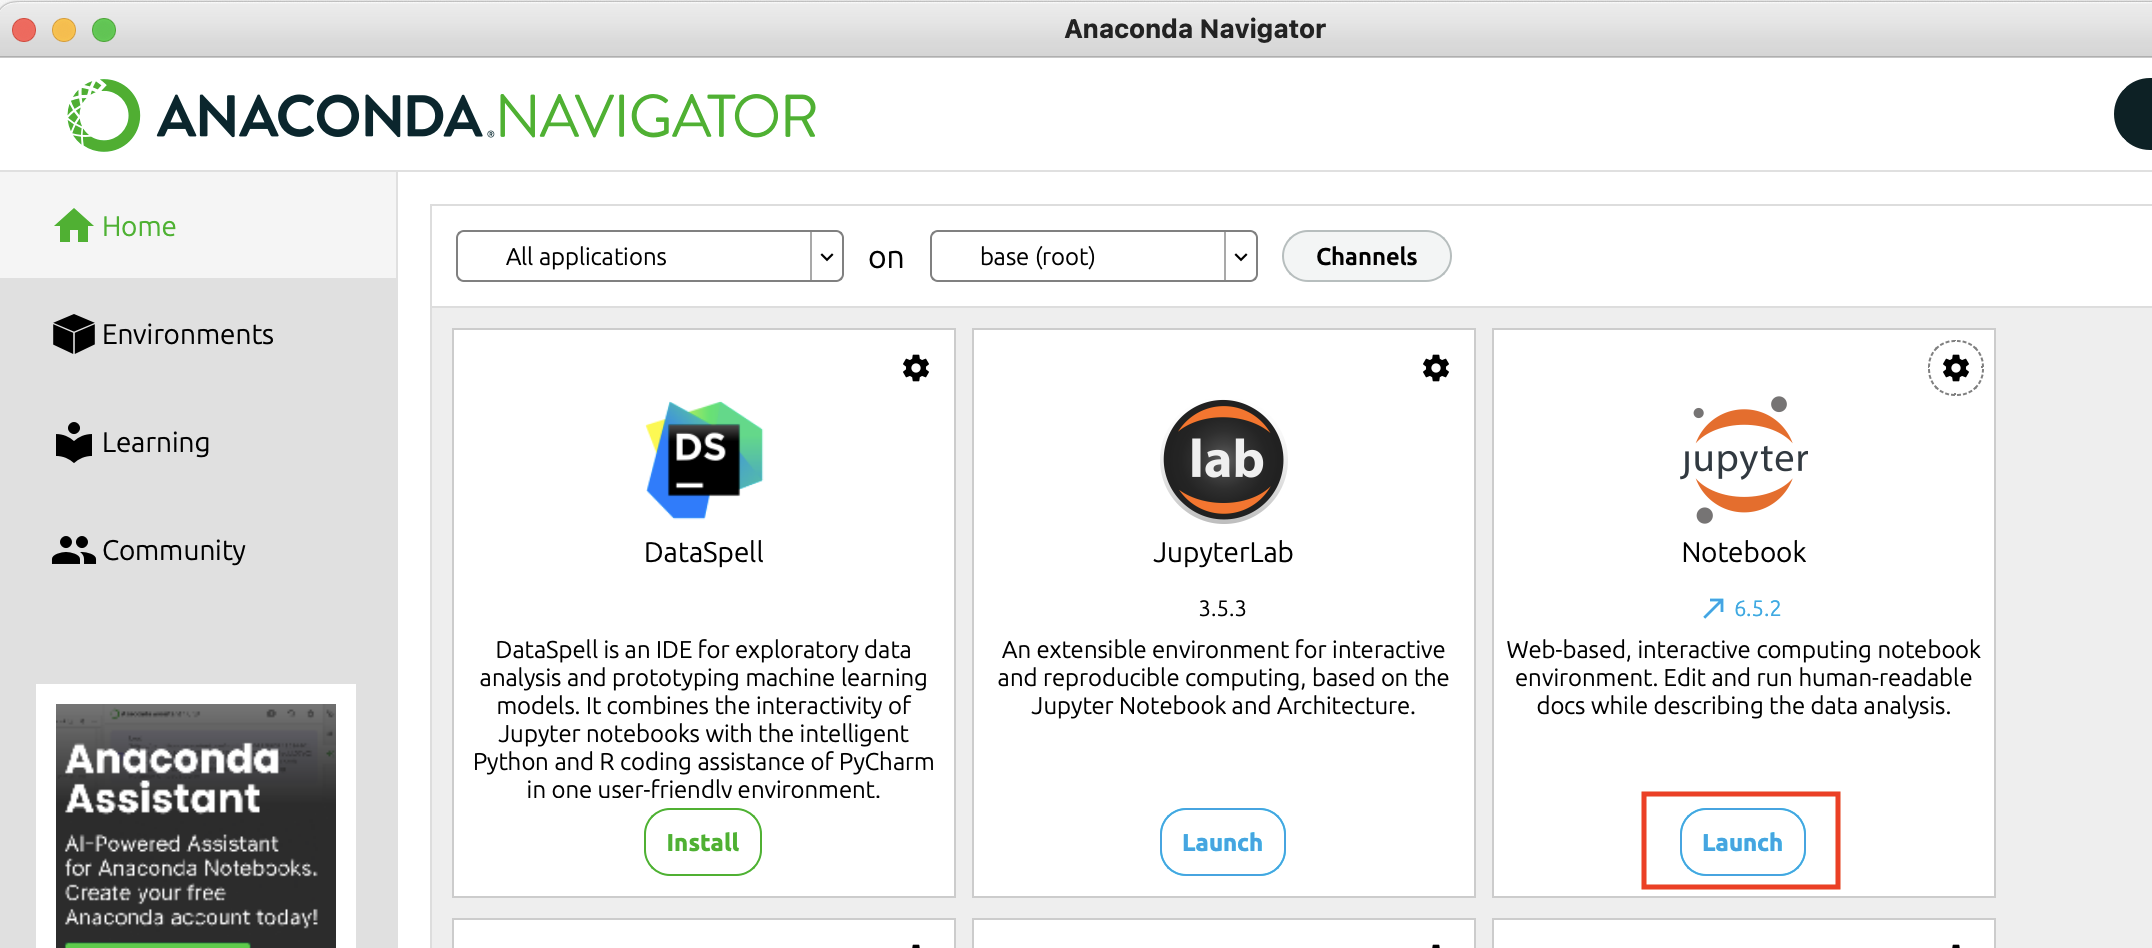
<br>

You may see a terminal window appear for a few seconds. After this, a browser window will launch. Jupyter Notebooks runs directly in your web browser. You should see something similar to **http://localhost:8889/tree** in the address bar.

<br>

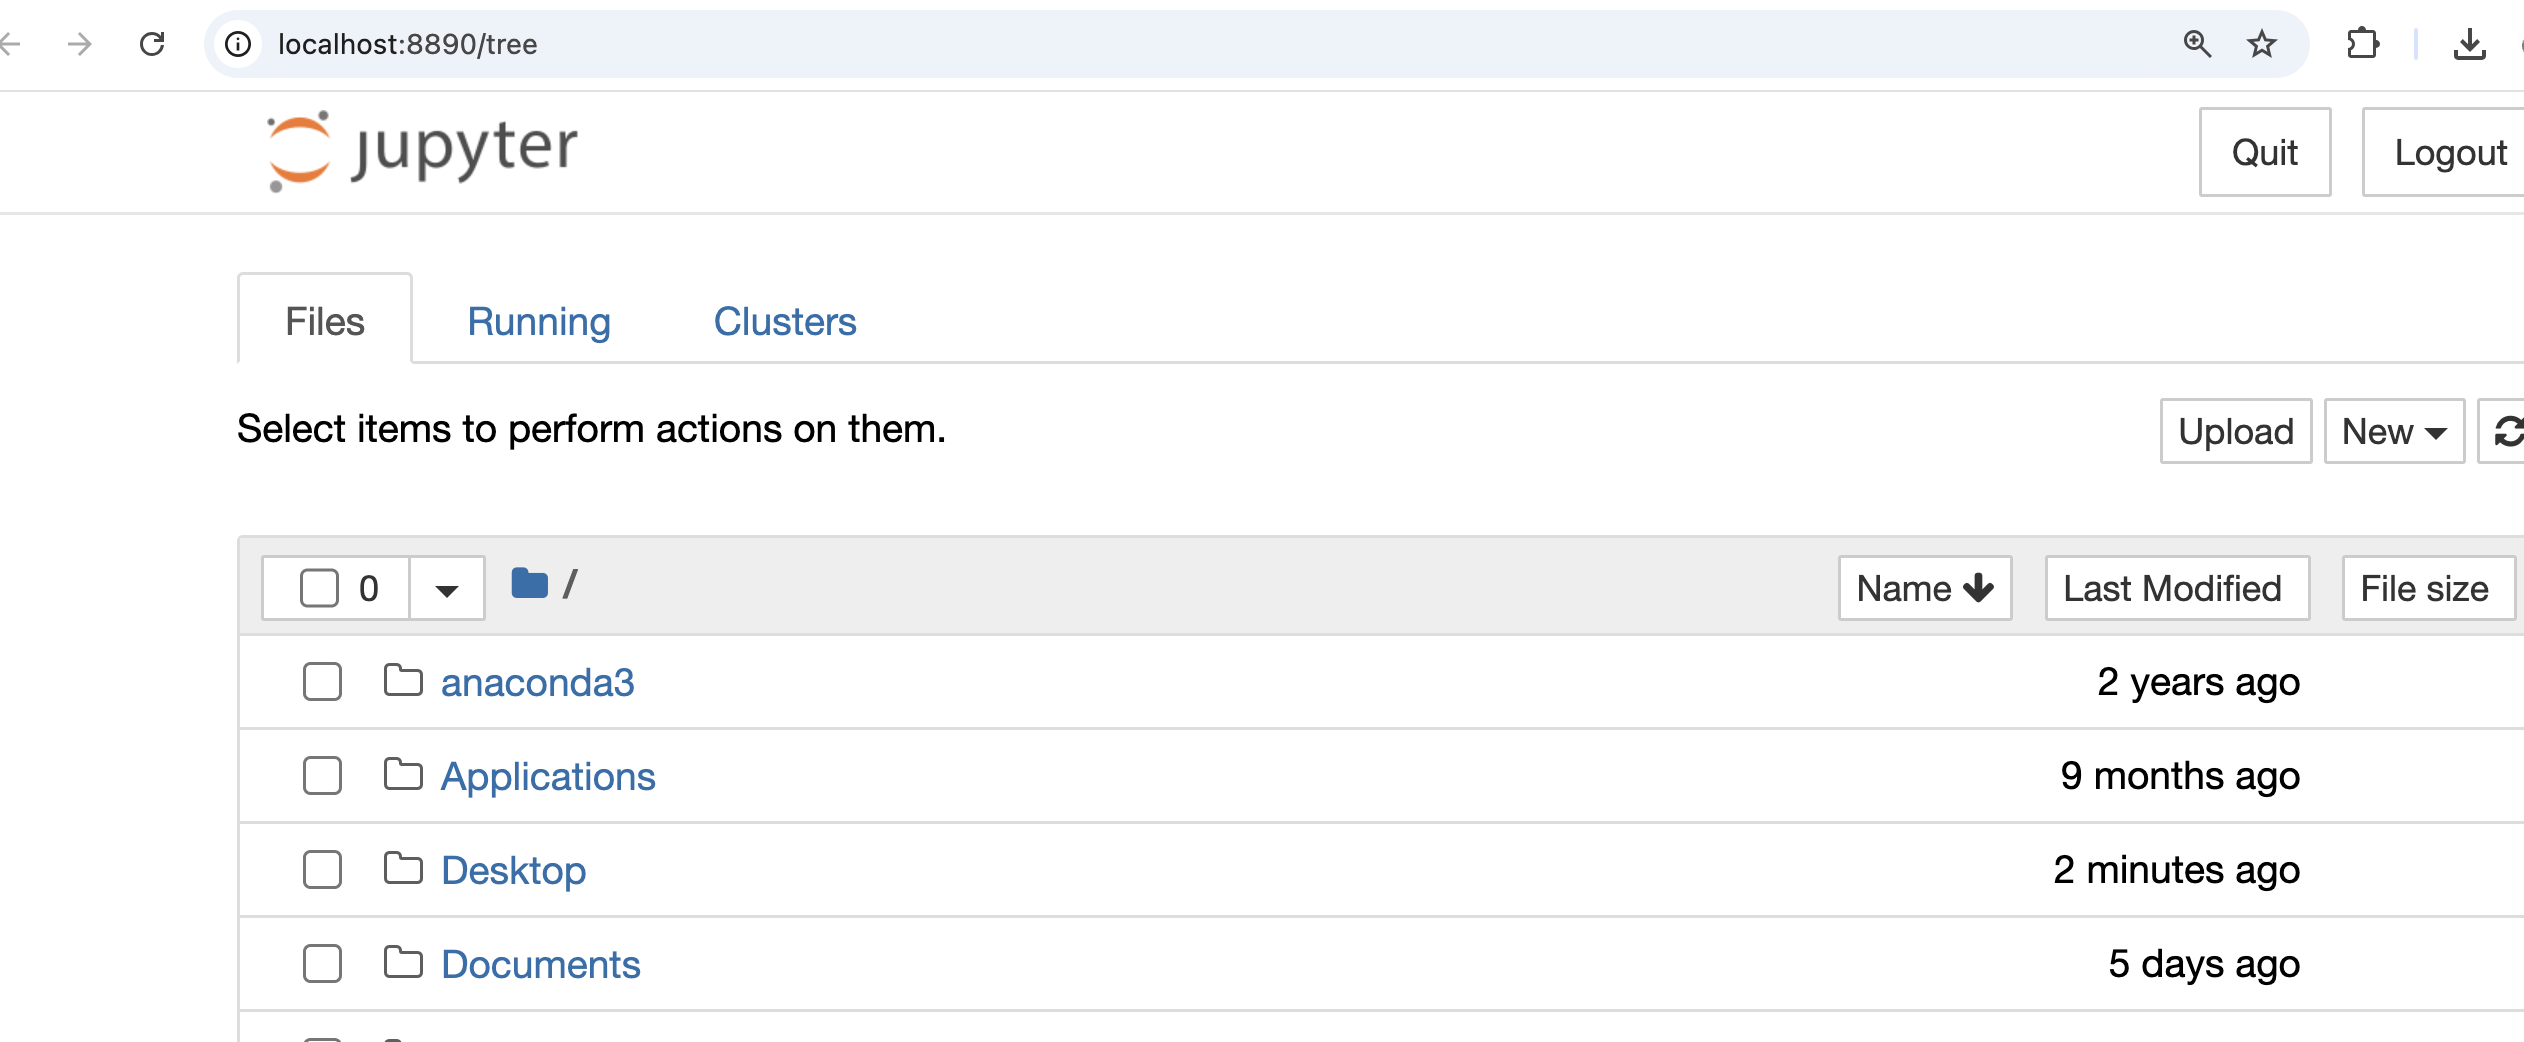

<br>

**Note**: If you do not want to install Acaconda locally, it is available on several computers on campus. Please [contact](https://mdl.library.utoronto.ca/about/contact-form) us for more information.

### **Downloading the Data Axle Files**

You'll first need to download the data file(s) you're interested in working with from Borealis, by navigating to the page for either [Canadian](https://doi.org/10.5683/SP3/IPKREG) or [US](https://doi.org/10.5683/SP3/GY5K1C) data. If you're not on campus, you'll need to login in order to download the files. You can do this by clicking on the "Off campus users log-in here" notice near the top of the page.

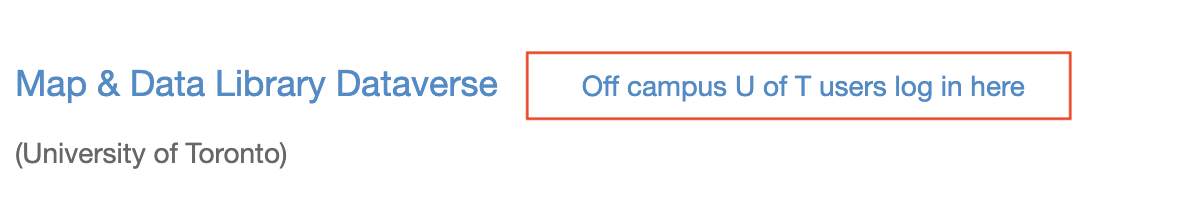

<br>

Once you've logged in, the red "locked" symbol beside each dataset will change to a green "unlocked" symbol.

As an example, if I wanted to work with the most recent Canadian data I would download **Canada DB 2024.csv**. You can download the file by clicking on the download arrow to the far right of the file name, and selecting the file type under "Download options". Note that all Canadian data files are in **.csv** format, while the US data is a **.txt** file that has been zipped up to accomodate larger file size.

<br>

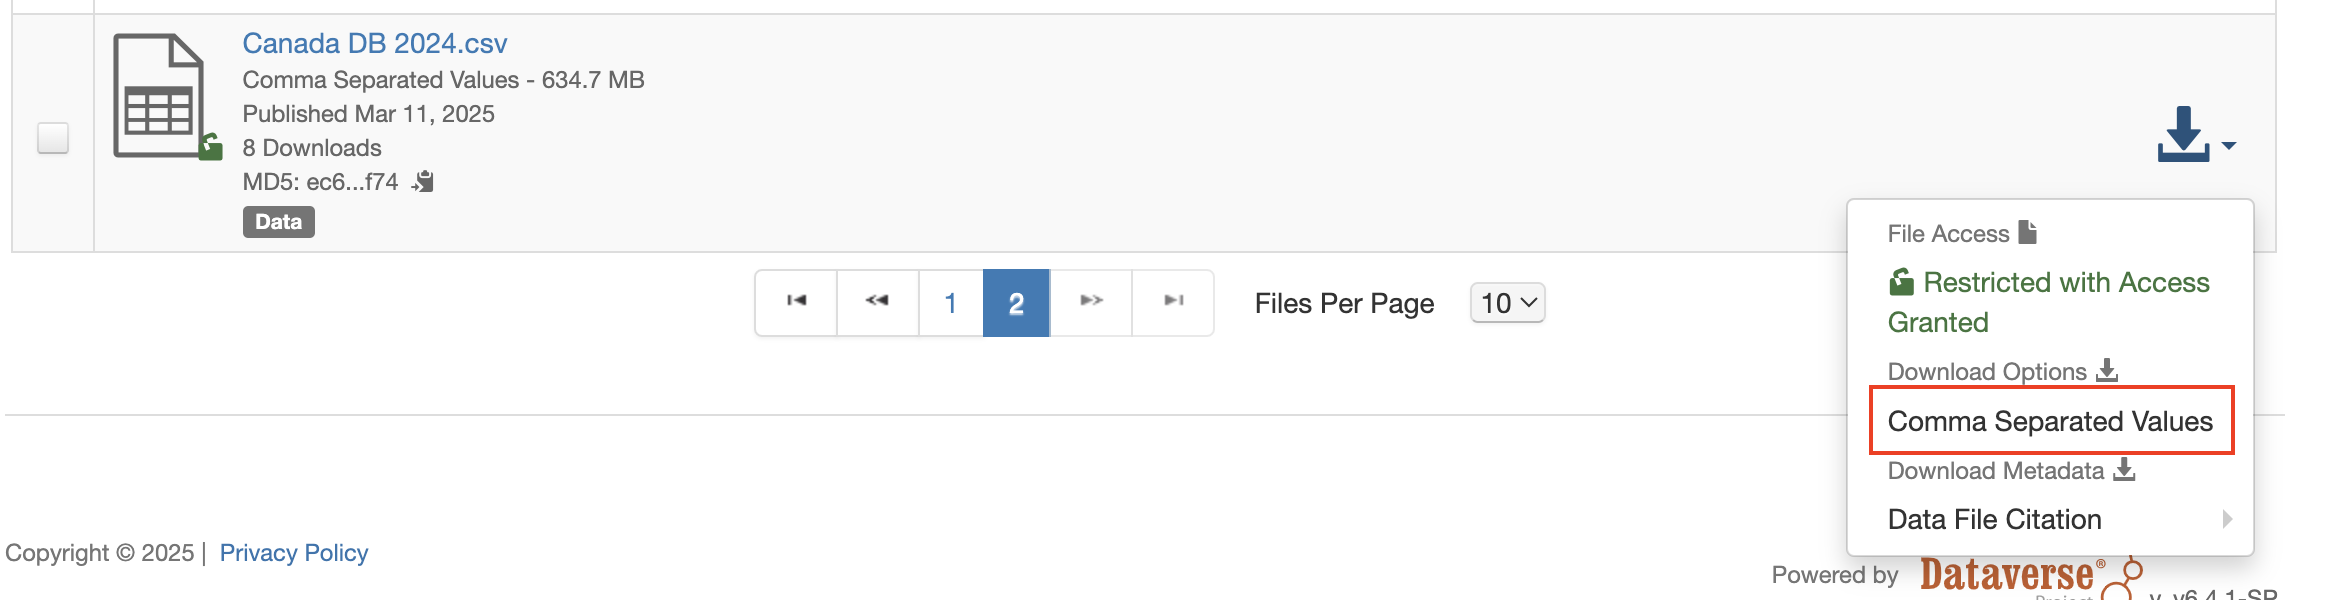

<br>


### **Uploading the Data Axle Files to Jupyter Notebooks**

Once you've downloaded the data, navigate back to your Jupyter Notebook browser window. Near the top right of the screen select **Upload**. A Windows Explorer or finder (Mac) window will appear. Select your file and click **Open**. You may get a warning about large file size - select **OK** to confirm. The file will now appear at the top of your Jupyter Notebooks file list, with buttons to either **Upload** or **Cancel** to the right of the file name. You will need to click the **Upload** button to initiate the upload. A progress bar will appear, and confirm once the upload has been completed.

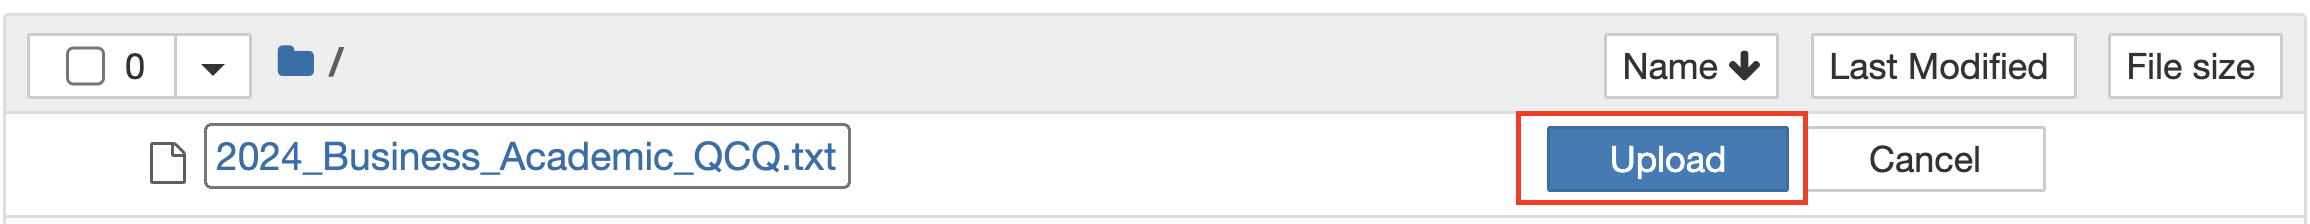



### **Working with the Data Axle Files in Jupyter Notebooks**

Once your dataset has been uploaded to Jupyter, you're ready to start analysing it using Python. To do so, you'll first need to open a new Notebook to write and execute your Python code. You can do this by selecting **New > Python 3** from the top right hand menu:

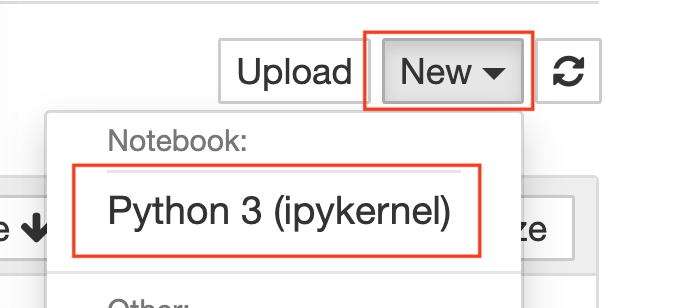

<br>

A new notebook will open automatically, titled **Untitled1**. You can change this file name by clicking on it and typing in a new title. This file will now appear in the landing page of your Jupyter Notebooks, so can easily be selected and relaunched at any time. <br>

**Once again, if this is your first time using Notebooks or Python**, please [watch](https://play.library.utoronto.ca/watch/b38ebfc6c8a6ac0da313b628e0300c05) our workshop *An Introduction to Programming for Absolute Beginners Using Python Pt. 1*, or [download the tutorial instructions](https://mdl.library.utoronto.ca/technology/tutorials/python-information-tutorials-and-workshops) for that same workshop and follow along. This will provide an overview of the Jupyter environment, as well as Python in general, including key terms and how to understand the basic syntax and structure of this programming language.

<br>

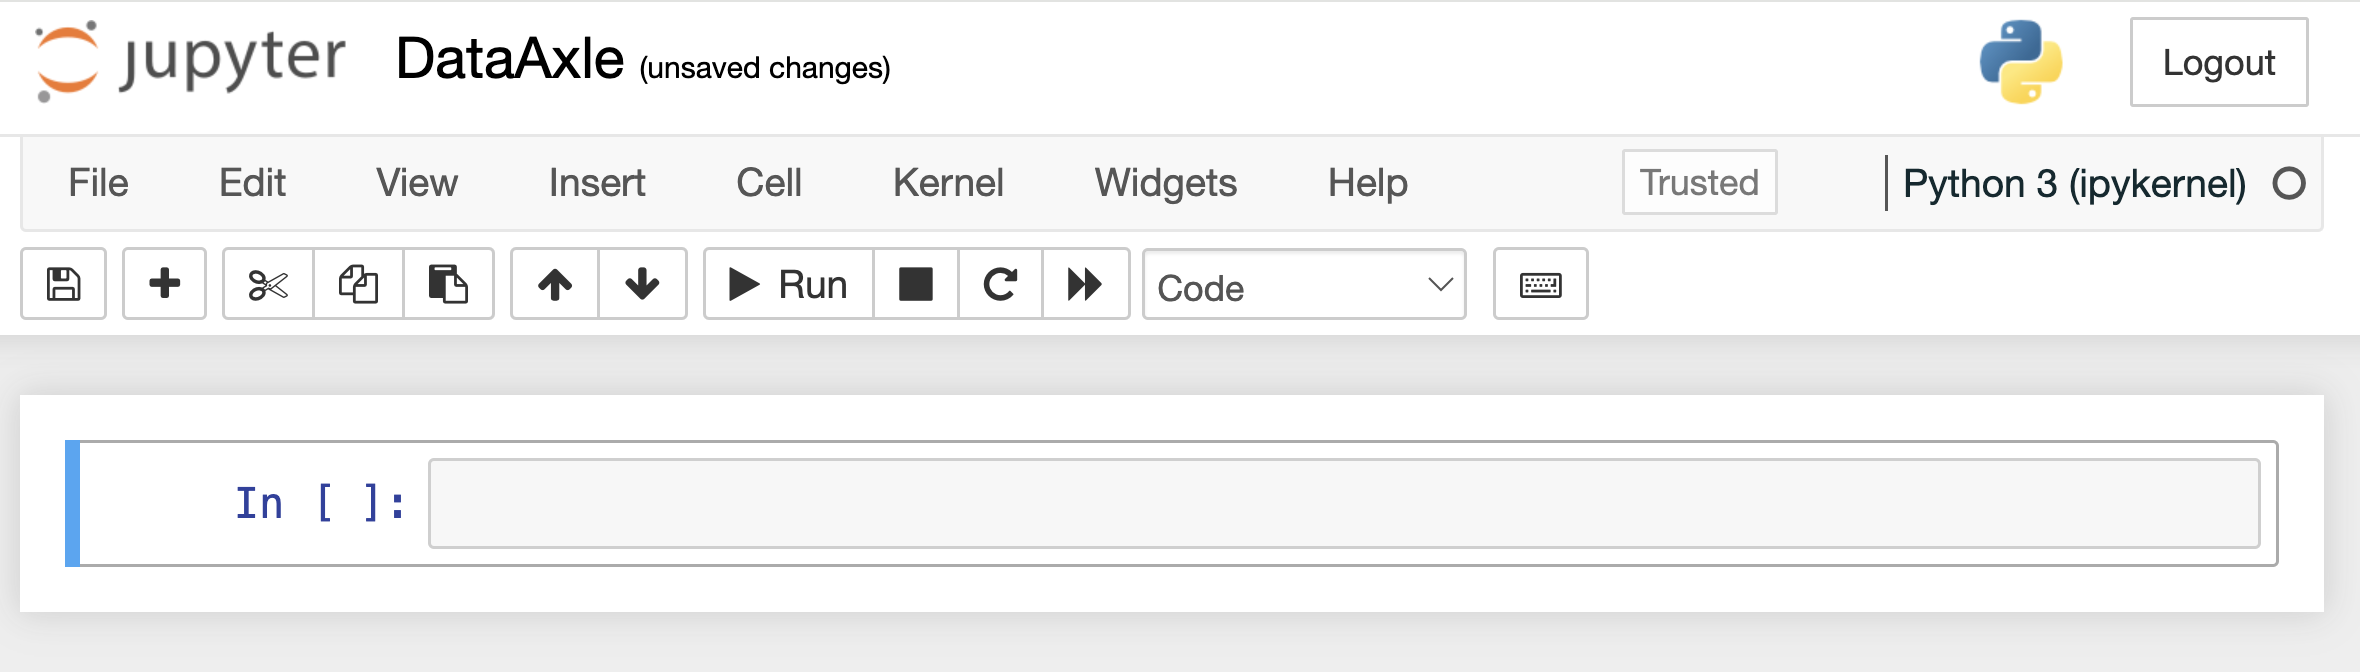

<br>

In order to work with these files, we'll need to import the **Pandas** library. This library is a collection of functions - blocks of code prewritten and designed to do specific things - that are tailored for working with tabular data files such as the Data Axle datasets. More detailed information on Pandas can be found [in their documentation](https://pandas.pydata.org/docs/user_guide/index.html). You can import Pandas by typing `import pandas as pd`. We can then use functions from this library by typing the shorthand `pd.[nameoffunction]`. <br>

Once we've imported our library, we also need to read in the Data Axle dataset as an object in Python so that we can work with it. We do this by using Panda's `read_csv` function, and assigning the output of that function to a variable name of our choice. For example `canada_data = pd.read_csv("Canada_DB_2024.csv", dtype=str)`. Note that I am using an additional argument (condition) here within the function to set the data type for all columns to "string". This is to  help avoid errors on import. If you wish to work with numbers as numerical data, you will need to reset the data type of those particular columns after import. <br>

I can now query my dataset by calling on the `canada_data` object.

### **Accessing the Getting Started Notebooks**

Once you have your data available as an Python object to work with inside of your Notebook, there are a couple of options. You can either:

1. Analyze the data in Python and export only results or derivatives
2. Use Python to subset the dataset, so that it contains a reasonable amount of rows and columns. You can then export this as a CSV and continue your analysis in a program such as Microsoft Excel

If you are a Python user, the first option is an excellent choice. Otherwise, we have created "getting started" notebooks that contain examples of how to subset the data for export. These notebooks provide examples of how to:

* **Preview the rows and columns in your dataset**
* **Generate a list of all columns in the dataset and preview values from a particular column only**
* **Change the data type of a single column or select columns**
* **Filter your data based on the values contained in one or more columns** - for example, if you are interested in businesses in a particular city only and/or those with more than 1000 employees
* **Filter your data to include only selected columns** - for example, you may want to keep only the business name, address, and employee size data for each row
* **Export your data to a csv**
  
These notebooks contain both example code and explanatory text to help you get started, and so that you can modify the examples as needed.

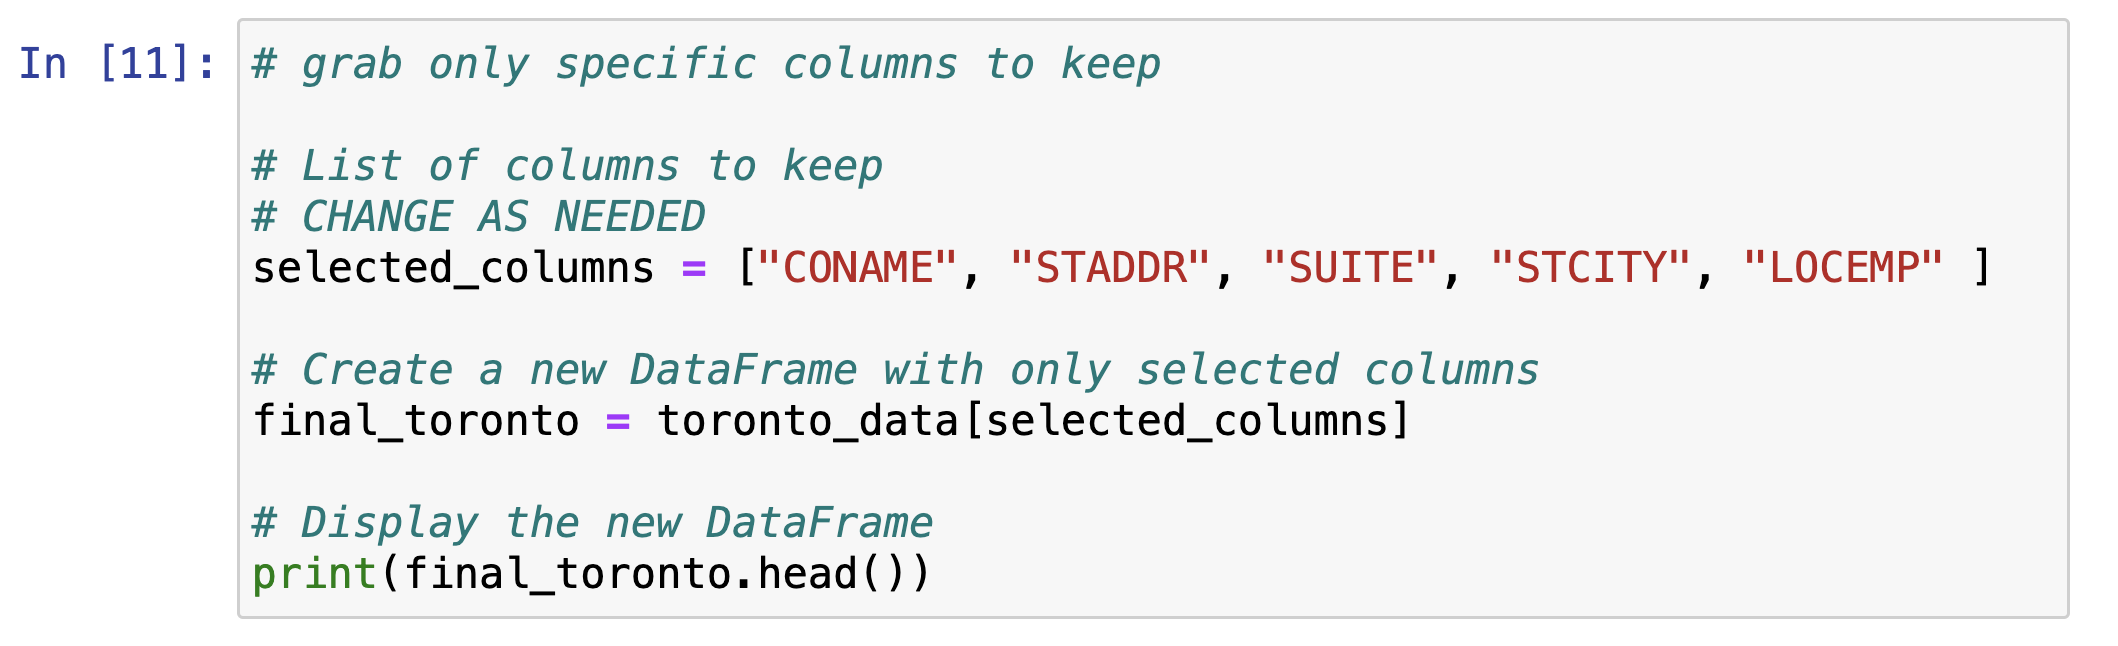

<br>

Note that notebooks for the Canadian and US datasets differ, as the source data is in a different format and the variables are distinct. Please download the appropriate notebook based on the data you intend to work with:

* [Download .ipynb file for Canadian Data](https://maps.library.utoronto.ca/workshops/DataAxleTutorial/Data_Axle_Filter_Canada.zip)
* [Download .ipynb file for US Data](https://maps.library.utoronto.ca/workshops/DataAxleTutorial/Data_Axle_Filter_US.zip)


Once you have downloaded the example notebooks, these can be uploaded to Jupyter Notebooks using the same upload process used for your data files above. Once uploaded, simply **click** on the Notebook to open it, and rename if appropriate.

These are just a few examples to help you get started, but of course there is much more you can do. If you have any questions, feel free to [contact us](https://mdl.library.utoronto.ca/about/contact-form).

**Date Created:** 2025-05-22 **Updated:** 2025-07-10